# **Proyecto 2 - HAB DSB09RT** 

<h2 style="text-align: left;"><strong><span style="color: #d65519;">__ ML aplicado a meneame.net __ </span></strong></h2>

[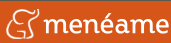](https://www.meneame.net/)

<h3 style="text-align: left;"><strong><span style="color: #a10684;">__ Grupo 1:  Gledson - Eva - Sara - Rubén - Luis Q </span></strong></h3>

### ***- - Importación de módulos y librerías - -***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Métricas para regresiones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regresores
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Validación
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

# 
<h1 style="text-align: left;"><strong><span style="color: #ff99cc;">__ Desarrollo del proyecto __ </span></strong></h1>

## **# Recopilación de datos 📦**

Hemos obtenido los datos mediante web scrapping de la web [meneame.net](https://www.meneame.net/)

_> *Se puede ver la recopilación de datos en la carpeta "Scrappers"* 

In [4]:
df = pd.read_csv("Data/MeneosCompleto.csv", delimiter=";")

pd.set_option("display.precision", 7)

df.head(3)

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0


## **# Limpieza de datos 🧹**

In [5]:
def limpieza_datos(df):
    
    #Limpieza de duplicados
    df.drop_duplicates()

    #Elimina las filas con valores NaN de las columnas que no son Clicks.
    lista_columnas = df.columns.to_list()
    lista_columnas.remove("Clicks")

    for columna in lista_columnas:
        lista_indices = df[df[columna].isna() == True].index.tolist()
        df = df.drop(index = lista_indices)

    # Creamos la columna delay que es el tiempo que transcurre entre que se envía el meneo y se publica
    df["Delay"] = df["Publicado"] - df["Enviado"]
    
    #Eliminación de columnas innecesarias
    df = df.drop(columns=["Medio", "Publicado", "Enviado"], axis=1)
    
    # Separamos nuestro dataframe en uno de train, test y otro de predicción
    df_tt = df[df["Clicks"].isna() == False]
    df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

    df_pred = df[df["Clicks"].isna() == True]
    df_pred.to_csv("Data/Datos_Pred.csv", index=False)

    return(df_tt)

In [6]:
df_tt = limpieza_datos(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274376 entries, 0 to 274375
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Titular      274373 non-null  object 
 1   Medio        274376 non-null  object 
 2   URL          274367 non-null  object 
 3   Enviado      274370 non-null  float64
 4   Publicado    274370 non-null  float64
 5   Meneos       274376 non-null  int64  
 6   Clicks       193678 non-null  float64
 7   Positivos    274369 non-null  float64
 8   Anonimos     274369 non-null  float64
 9   Negativos    274369 non-null  float64
 10  Comentarios  274367 non-null  float64
 11  Karma        274369 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 25.1+ MB


In [8]:
df.shape

(274376, 12)

### **¿Cómo hemos construido la función? 🧐** 

In [9]:
#Empezamos eliminando duplicados

df.drop_duplicates()

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0
3,Todos los israelíes están entrenados en hasbar...,reddit.com,https://old.meneame.net/story/todos-israelies-...,1715361389.0,1715375102.0,117,1256.0,69.0,48.0,5.0,24.0,410.0
4,Cuando Einstein llamó “fascistas” a los gobern...,cadtm.org,https://old.meneame.net/story/cuando-einstein-...,1715346981.0,1715373609.0,260,415.0,139.0,121.0,2.0,17.0,461.0
...,...,...,...,...,...,...,...,...,...,...,...,...
274371,Instalar Linux en iPod Mini | GPL Tarragona,gpltarragona.org,https://old.meneame.net/story/instalar-linux-e...,1133950966.0,1133953201.0,29,NaN,29.0,0.0,0.0,0.0,31.0
274372,Entrevista de El Mundo a Jose Antonio Marina,el-mundo.es,https://old.meneame.net/story/entrevista-de-el...,1133946888.0,1133951401.0,18,NaN,18.0,0.0,0.0,0.0,22.0
274373,Prova xfce 4.2.3!,xfce.org,https://old.meneame.net/story/prova-xfce-423,1133945900.0,1133947801.0,34,NaN,34.0,0.0,0.0,0.0,13.0
274374,Los 84 errores de noxtrum,pacoros.net,https://old.meneame.net/story/los-84-errores-d...,1133943563.0,1133943902.0,61,NaN,61.0,0.0,0.0,5.0,11.0


In [10]:
df.isna().sum()

Titular            3
Medio              0
URL                9
Enviado            6
Publicado          6
Meneos             0
Clicks         80698
Positivos          7
Anonimos           7
Negativos          7
Comentarios        9
Karma              7
dtype: int64

In [11]:
df.shape

(274376, 12)

In [12]:
#Eliminamos las filas con valores NaN de las columnas que no son Clicks.

lista_columnas = df.columns.to_list()
lista_columnas.remove("Clicks")

for columna in lista_columnas:
    lista_indices = df[df[columna].isna() == True].index.tolist()
    df = df.drop(index = lista_indices)

In [13]:
# Creamos la columna delay que es el tiempo que transcurre entre que se envía el meneo y se publica
df["Delay"] = df["Publicado"] - df["Enviado"]

In [14]:
# Una vez calculada esa columna, enviado y publicado no hacen falta

df = df.drop(columns=["Enviado", "Publicado"], axis=1)

In [15]:
df.head(3)

,Titular,Medio,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0


In [16]:
# Tenemos 30614 medios diferentes...

df["Medio"].value_counts()

Medio
eldiario.es                    10261
youtube.com                     8239
elpais.com                      7274
publico.es                      7010
elmundo.es                      6747
                               ...  
ncov.r6.no                         1
dosmaletas.blogcindario.com        1
nbcwashington.com                  1
skamasle.com                       1
reviews.zdnet.co.uk                1
Name: count, Length: 30614, dtype: int64

In [17]:
# Eliminamos la columna medio porque la dimensionalidad es demasiado grande

df = df.drop(columns=["Medio"], axis=1)

In [18]:
df.head()

,Titular,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,69.0,48.0,5.0,24.0,410.0,13713.0
4,Cuando Einstein llamó “fascistas” a los gobern...,https://old.meneame.net/story/cuando-einstein-...,260,415.0,139.0,121.0,2.0,17.0,461.0,26628.0


## **# Separamos datos** 

No siempre la web con la que trabajamos recopilaba la información de Clicks que los usuarios hacían en las noticias publicadas. Concretamente, antes de 2010 la web no tiene información sobre los clicks.

Nuestro objetivo es predecir los clicks que tendrían dichas noticias y es por ello que hacemos esta separación de los datos de nuestro dataframe: las noticias que tienen clicks recopilados y las que no

In [19]:
# Separamos nuestro dataframe en uno de train, test (df_tt) y otro de predicción (df_pred)

df_tt = df[df["Clicks"].isna() == False]
df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

df_pred = df[df["Clicks"].isna() == True]
df_pred.to_csv("Data/Datos_Pred.csv", index=False)

## **# EDA** 🔍

Analizamos los datos que nos hemos quedado para entrenar los modelos (df_tt)

### **¿Cómo se correlacionan las diferentes variables? 📈**

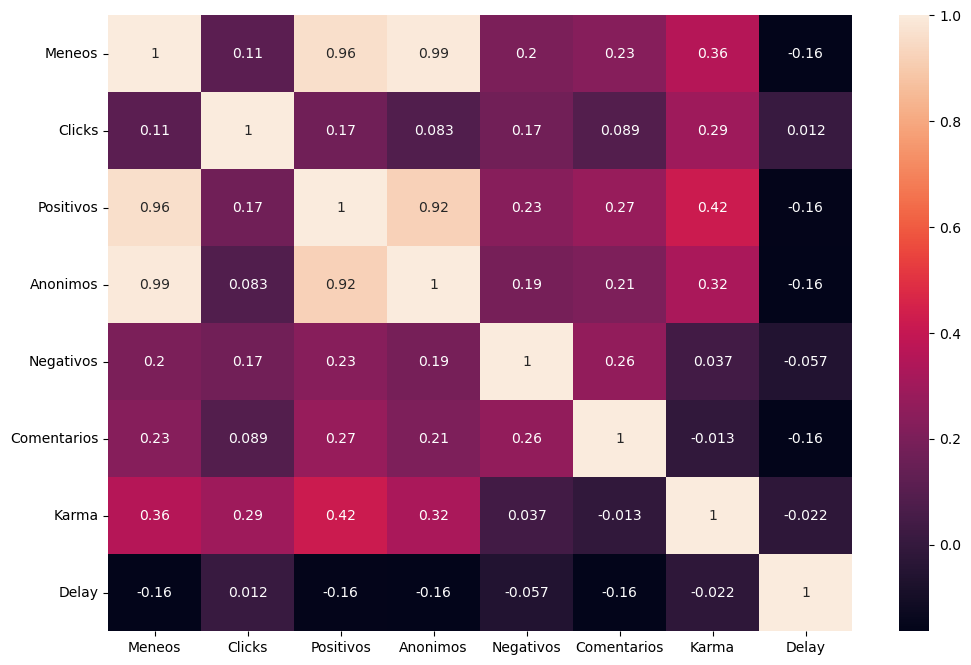

In [20]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_tt._get_numeric_data().corr(), annot = True)
plt.show()

### **Exploramos cada columna**

Cada columna en relación con la columna objetivo (Clicks)

In [37]:
def plot_numeric(df, feature, target="Clicks", transform=None):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    
    if transform == False or transform == None:
        sns.scatterplot(df, x=df[feature], y=target, ax=ax[0])
        sns.boxplot(y=df[target], ax=ax[1])
    else:
        sns.scatterplot(df, x=df[feature], y=df[target].apply(transform), ax=ax[0])
        sns.boxplot(y=df[target].apply(transform), ax=ax[1])
    plt.show()


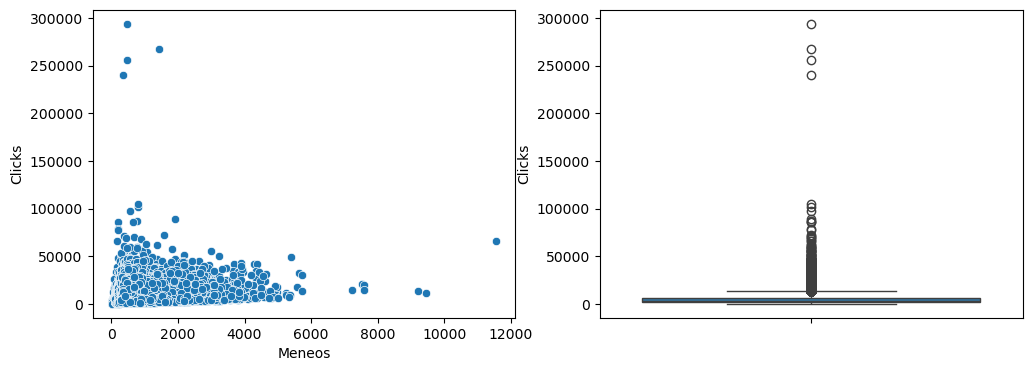

In [38]:
plot_numeric(df_tt, "Meneos")

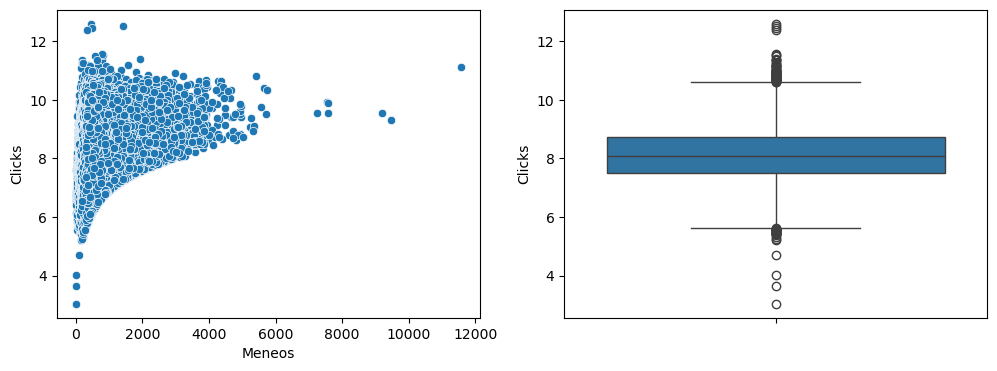

In [45]:
plot_numeric(df_tt, "Meneos", transform=np.log)

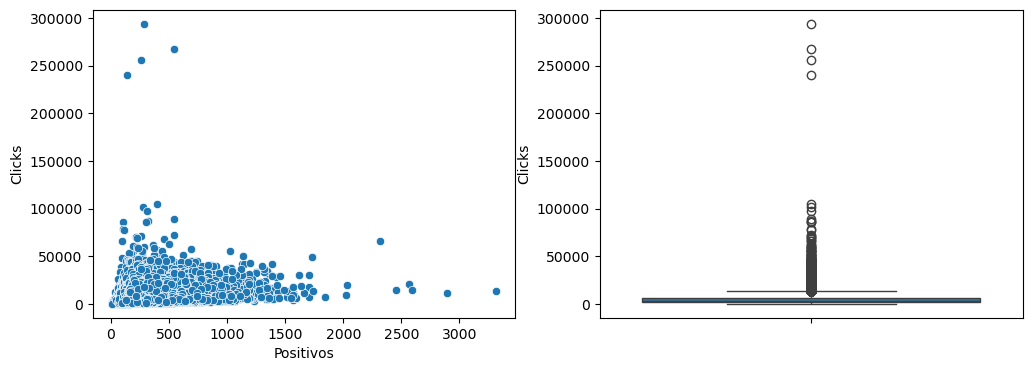

In [39]:
plot_numeric(df_tt, "Positivos")

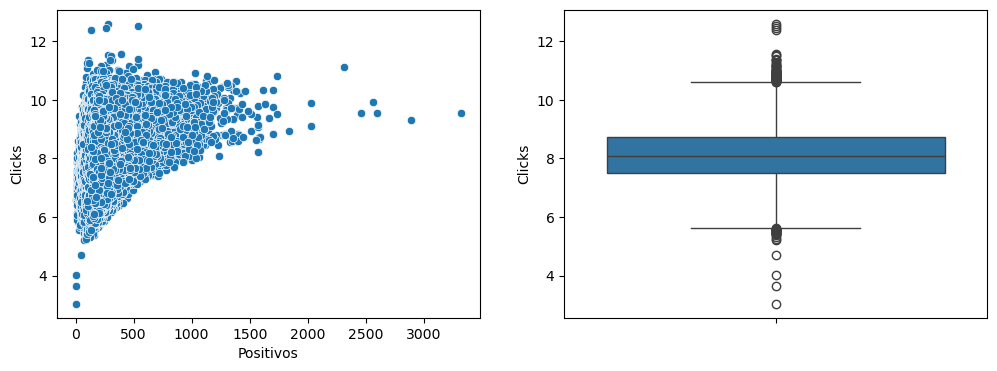

In [46]:
plot_numeric(df_tt, "Positivos", transform=np.log)

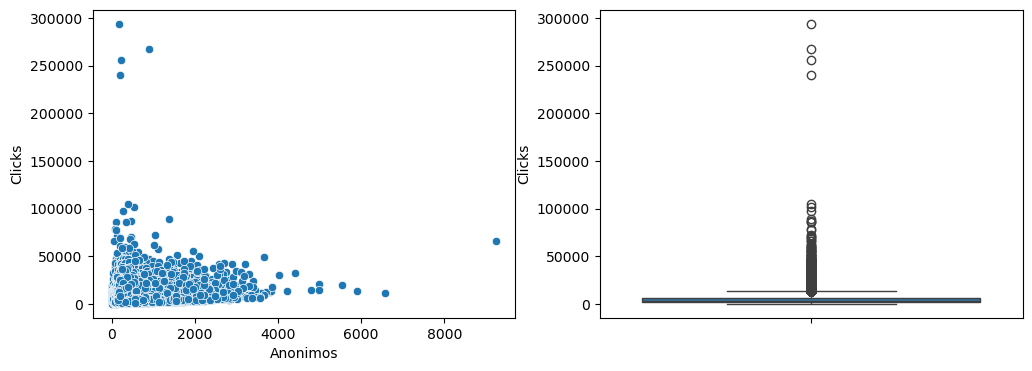

In [40]:
plot_numeric(df_tt, "Anonimos")

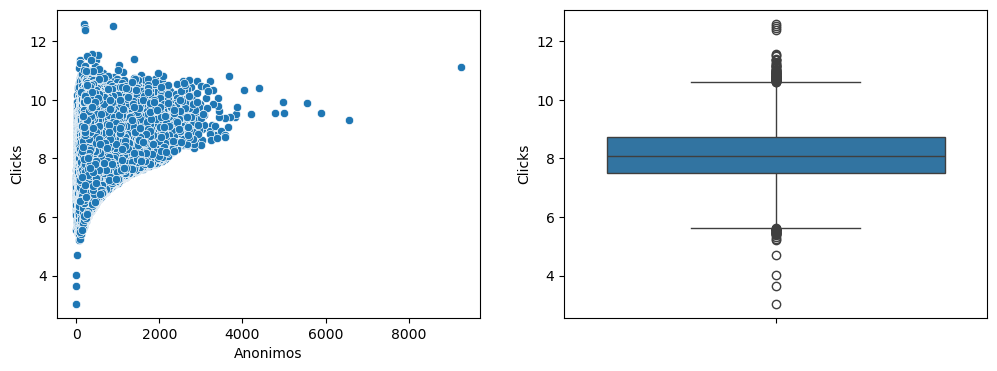

In [47]:
plot_numeric(df_tt, "Anonimos", transform=np.log)

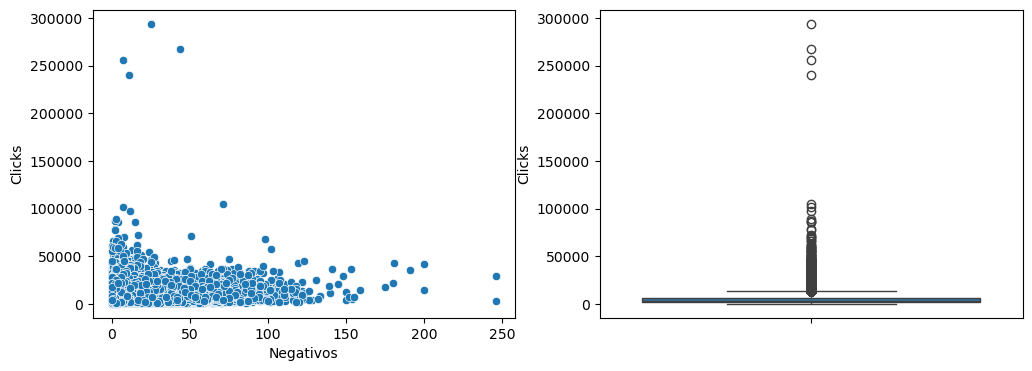

In [41]:
plot_numeric(df_tt, "Negativos")

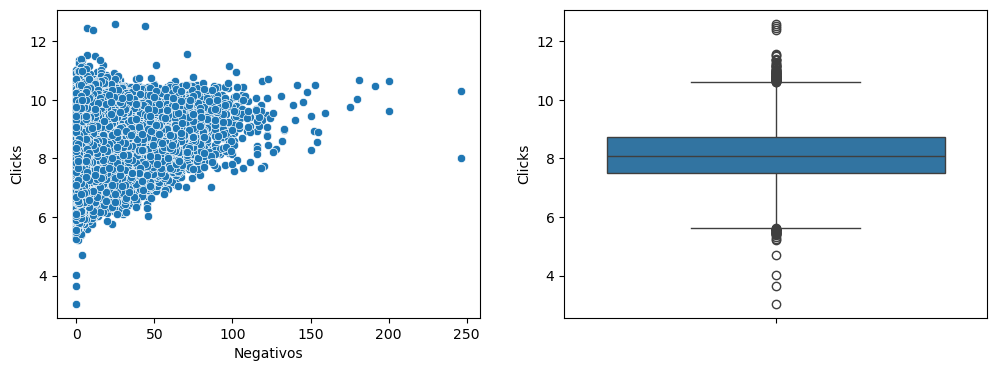

In [48]:
plot_numeric(df_tt, "Negativos", transform=np.log)

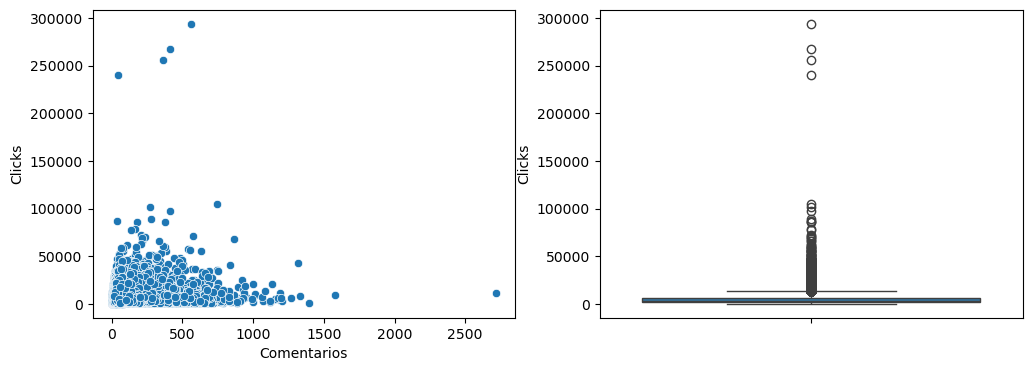

In [42]:
plot_numeric(df_tt, "Comentarios")

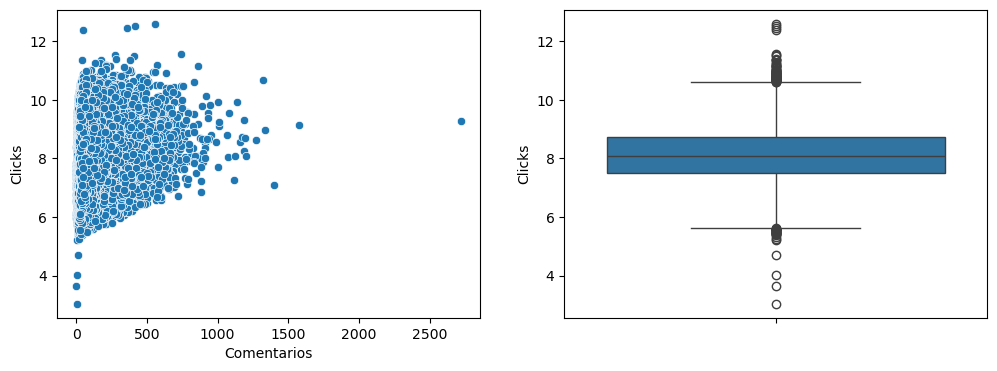

In [49]:
plot_numeric(df_tt, "Comentarios", transform=np.log)

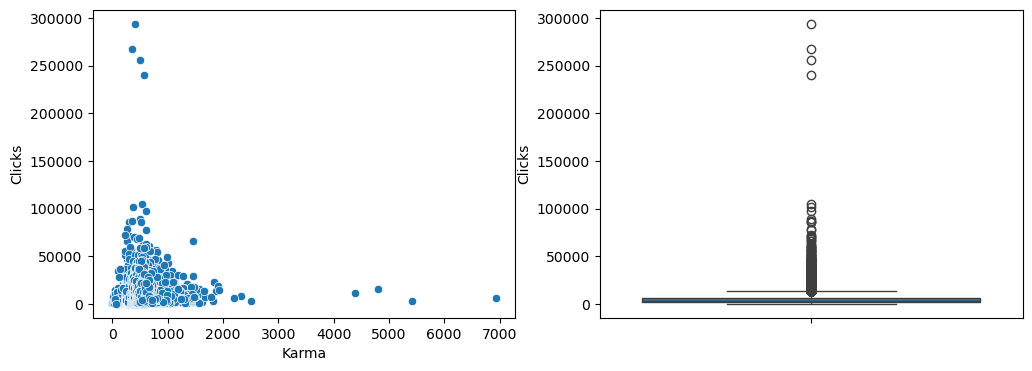

In [43]:
plot_numeric(df_tt, "Karma")

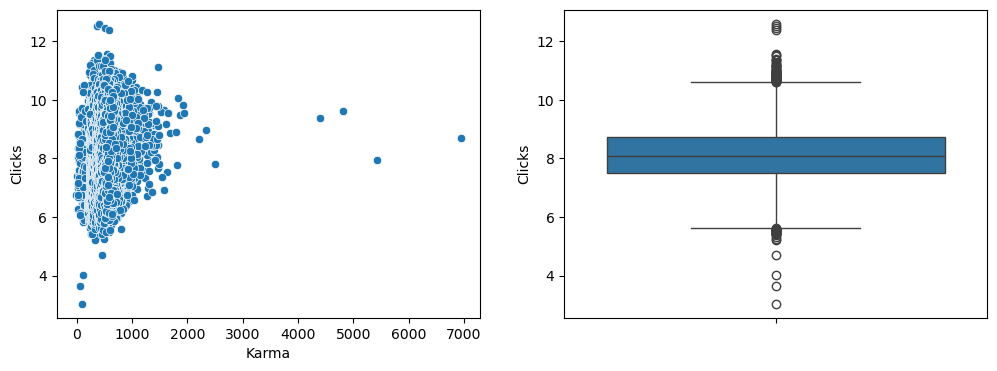

In [50]:
plot_numeric(df_tt, "Karma", transform=np.log)

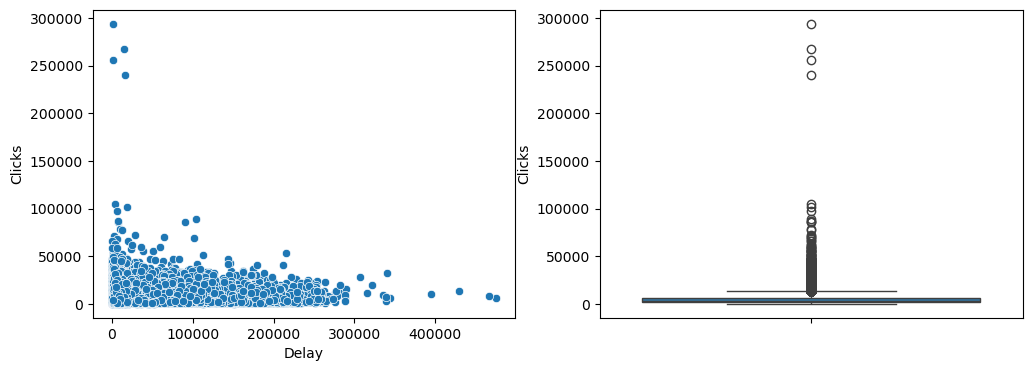

In [44]:
plot_numeric(df_tt, "Delay")

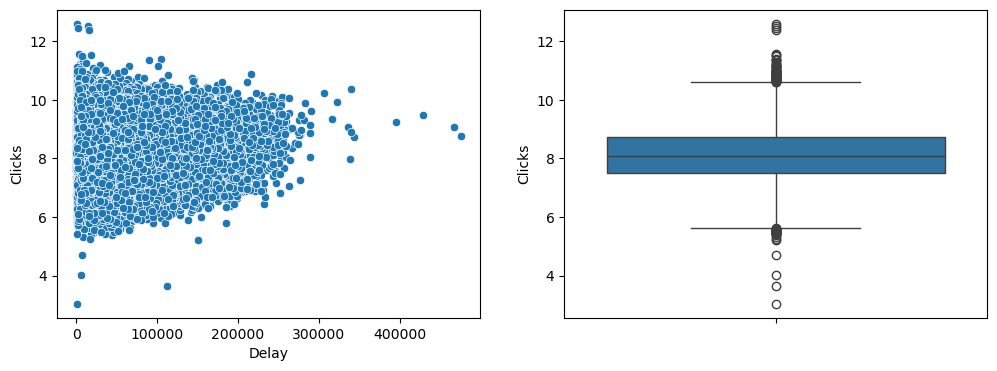

In [51]:
plot_numeric(df_tt, "Delay", transform=np.log)

## **# Comienza el entrenamiento... 🏋🏽**

### ***> Modelos***:
```python
modelos = [LinearRegression(),
            KNeighborsRegressor(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            SVR(),
            AdaBoostRegressor(),
            GradientBoostingRegressor()]
```

In [26]:
df_tt.head(3)

,Titular,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0


### ⏩ **Primer intento**

_> *Se puede ver en el notebook "Pruebas_regresión/predicción_cliks_V1"*

### ***> Datos***:
Tal como estaban los datos hasta el momento, tratamos de entrenarlos con varios modelos.  

### ***> Resultado***:

Primer intento fallido. Casi perdimos un ordenador por el camino...  
El RadiusNeighborsRegressor lo descartamos en este momento, porque es muy pesado. Además, con radios pequeños no encontraba vecinos por lo que era muy difícil encontrar radios óptimos.


![Alt Text](https://media1.tenor.com/m/tWD3GjJcoHgAAAAC/spongebob-computer.gif)


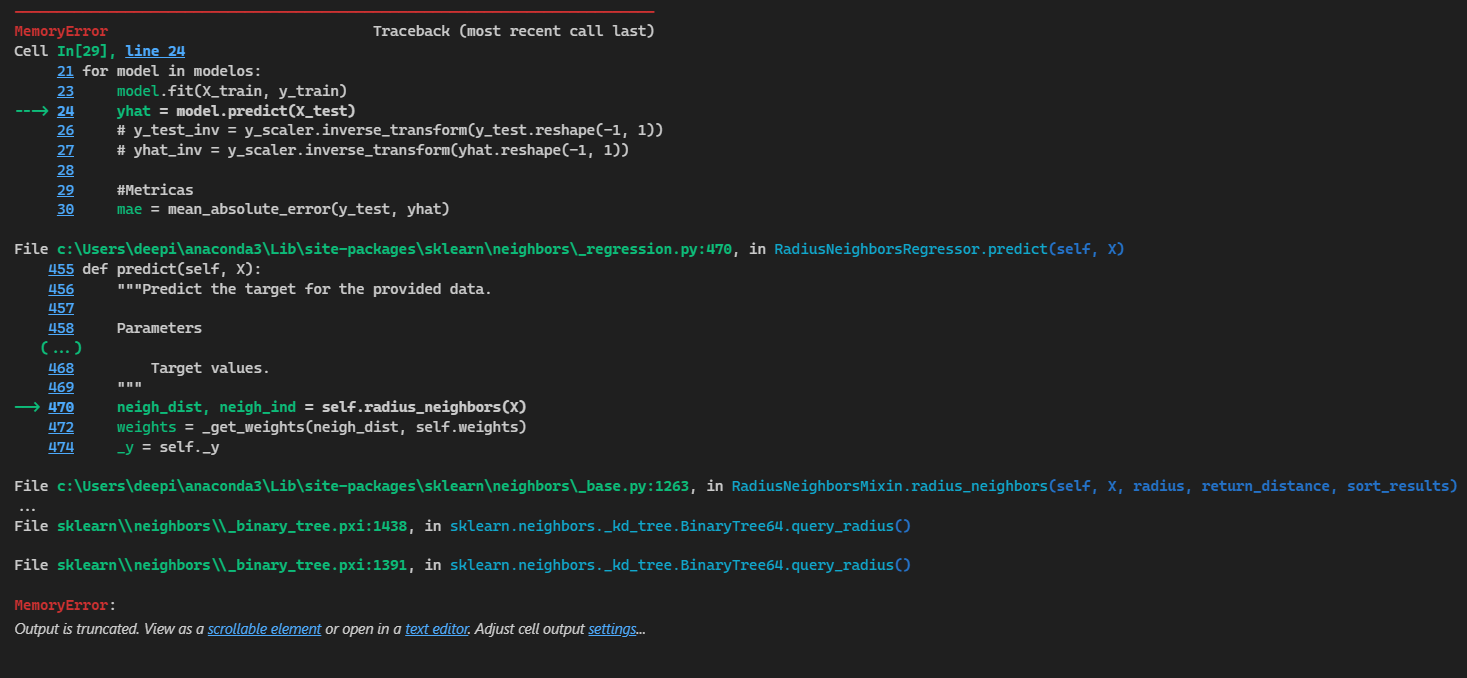 



### ⏩ **Segundo intento**

_> *Se puede ver en el notebook "Pruebas_regresión/predicción_cliks_V2"*

### ***> Datos***:
Tras el fracaso del primer intento, tomamos las siguientes decisiones:

- Eliminar outliers.
- Clasificar la columna "Delay" en 5 categorías para reducir la cantidad de datos que tenemos.
- Eliminar las columnas "Positivos" y "Anonimos" puesto que la columna "Meneos" es la suma de ambas.

### ***> Resultado***:

No convencen a nuestro equipo de profesionales 
## 🤔

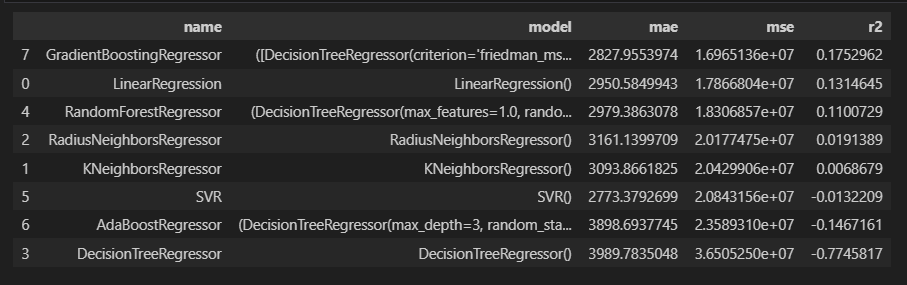 





### ⏩ **Tercer intento**

_> *Se puede ver en el notebook "Pruebas_regresión/predicción_cliks_V3(clustering)"*

### ***> Datos***:

Al ver que no han mejorado las métricas, decidimos intentar hacer primero un clustering de los datos con Kmeans.

### ***> Resultado***:

Probamos con el Cluster 0 y como no dio buenos resultados, no se ejecutó el resto

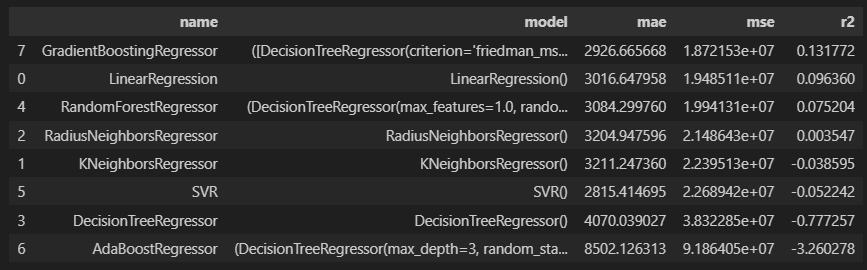


### ⏩ **Cuarto intento**

_> *Se puede ver en el notebook "Pruebas_regresión/predicción_cliks_V4"*

### ***> Datos***:

Esta vez probamos a:

- quitar la columna Delay
- modificar parámetros del KNeighbors


### ***> Resultado***:

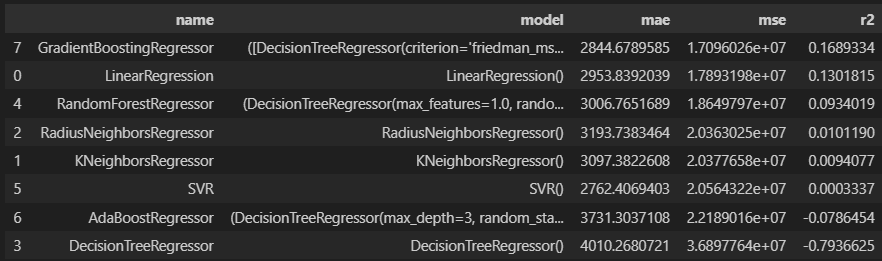

### ⏩ **Quinto intento**

_> *Se puede ver en el notebook "Pruebas_regresión/predicción_cliks_V5"*

### ***> Datos***:

Probamos incluyendo de nuevo la columna Delay, pero pasándole primero una transformación logarítmica a aquellas columnas con una distribución asimétrica.

### ***> Resultado***:

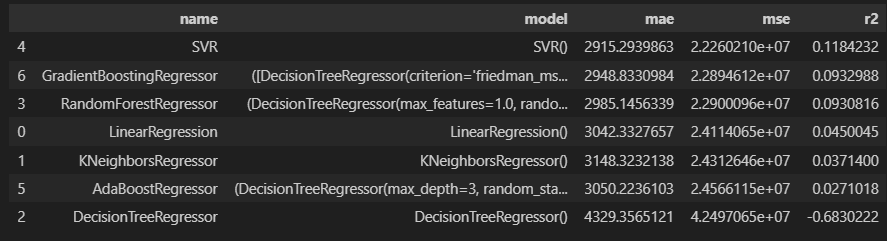


Con todos nuestros intentos, hasta aquí llegamos con la predicción mediante regresión. Desistimos de intentar predecir los clicks de esta manera y lo convertimos en un problema de clasificación.

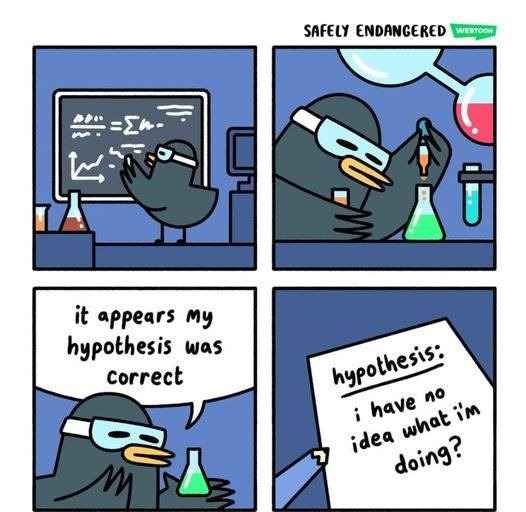

### ⏩ **Cambio de rumbo**

_> *Se pueden ver en los notebooks "Pruebas_Clasificación/predicción_clicks_clasificacion(n=X)"*

Para el problema de clasificación, comenzamos dividiendo en 5 grupos, 4, 3 y 2

### ***> Resultados***:

#### 🔵 5 grupos 

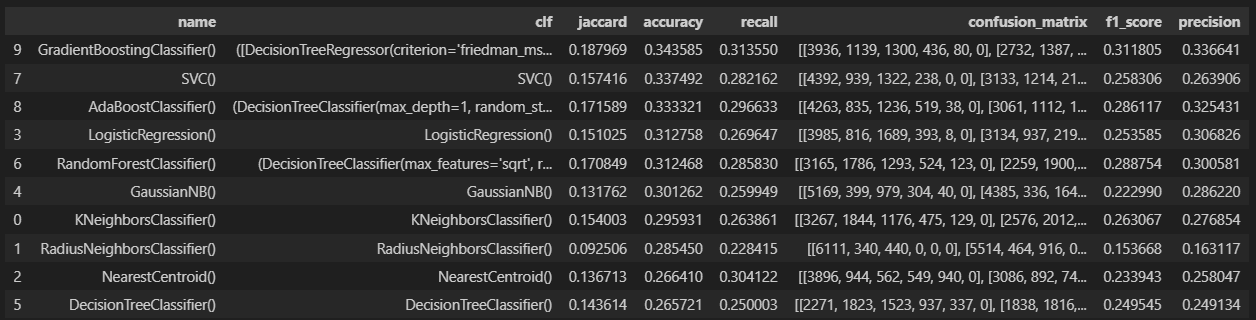

#### 🔵 4 grupos 

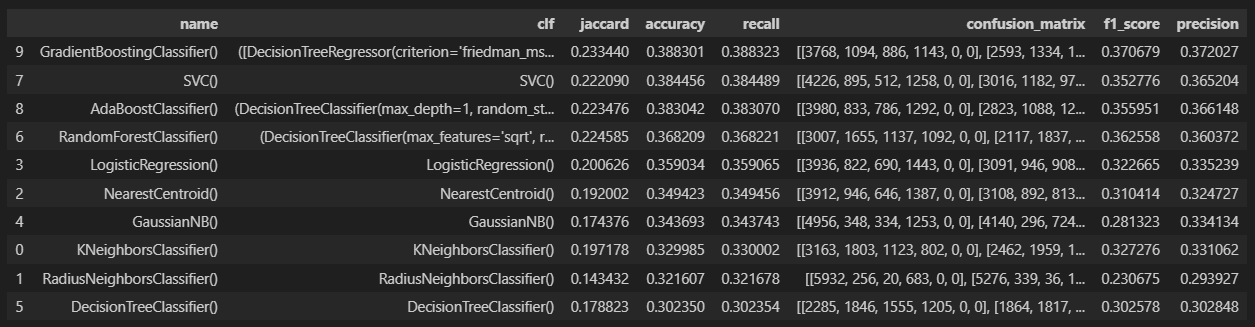

#### 🔵 3 grupos 

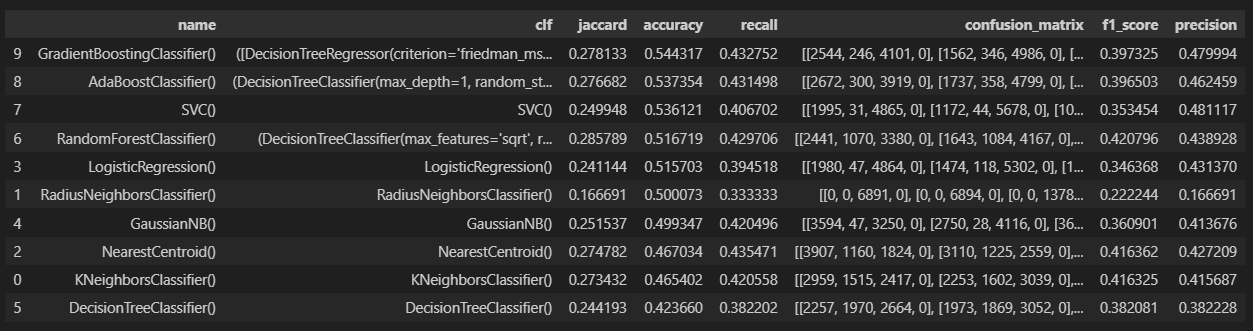

#### 🔵 2 grupos 

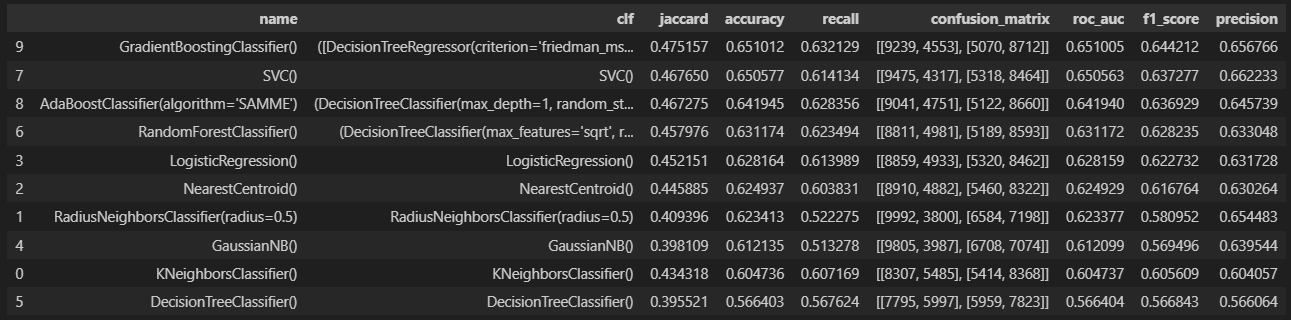


### ***> Conclusión***:

Con estos resultados, llegamos a la conclusión final de quedarnos con 2 grupos, pues las métricas ya nos dieron unos resultados aceptables. Así, entrenamos el modelo definitivo  
_> *En el notebook "predicción_clicks_clasificacion(n=2)" se pueden ver todos los resultados*

![Alt Text](https://media1.tenor.com/m/Z_IV0-4w2vEAAAAC/yes-winning.gif)
